In [1]:
import pandas as pd
import numpy as np

# Criando o número total de produtos em um dicionário
num_produtos = 600
produtos = {
    'produto_id': range(1, num_produtos + 1),
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Definindo DataFrame de produtos
df_produtos = pd.DataFrame(produtos)

# Criando o número de venda em um dicionário
num_vendas = 1000 #
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas), #
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas), #
    'valor_total': np.random.randint(1000, 10000, num_vendas) #
}

# Definindo DataFrame de vendas
df_vendas = pd.DataFrame(data_vendas)

# Salvando produtos e vendas em um arquivo CSV
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Extração de dados de produtos e vendas a partir do arquivo CSV
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Mesclando os DataFrames de vendas e produtos
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salvando o DataFrame mesclado em um arquivo CSV
df_merge.to_csv('data_warehouse.csv', index=False)

# Imprimindo os dados
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data WareHouse: ")
print(df_warehouse)

Conteúdo do Data WareHouse: 
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-05         392          58         9453  Produto 392  Eletrônicos
1    2024-04-24         137          97         8318  Produto 137       Roupas
2    2024-04-21         137          69         1461  Produto 137       Roupas
3    2024-04-07         137         118         4454  Produto 137       Roupas
4    2024-04-06         424         103         1801  Produto 424  Eletrônicos
..          ...         ...         ...          ...          ...          ...
995  2024-04-01         468          75         2943  Produto 468  Eletrônicos
996  2024-04-29         437         160         3633  Produto 437    Alimentos
997  2024-04-05         222         159         7670  Produto 222  Eletrônicos
998  2024-04-27         129         182         1702  Produto 129  Eletrônicos
999  2024-04-01         107          73         3074  Produto 107    Alimentos

[1000 rows x 6 columns

Análise de vendas por produto: 
             quantidade  valor_total
nome                                
Produto 1           183         8312
Produto 100         166         5688
Produto 102         100         7857
Produto 103         671        25870
Produto 104         654        19504
...                 ...          ...
Produto 94           56         4868
Produto 95          298         9325
Produto 96          407         8379
Produto 98          452        20412
Produto 99          325        10601

[490 rows x 2 columns]

Análise de vendas por categoria de produto: 
             quantidade  valor_total
categoria                           
Alimentos         40421      1798186
Eletrônicos       40608      1809873
Roupas            41778      1803800

Análise de tendências temporis: 
            quantidade  valor_total
data                               
2024-04-01        3131       151247
2024-04-02        3110       138408
2024-04-03        4851       192252
2024-04-04        

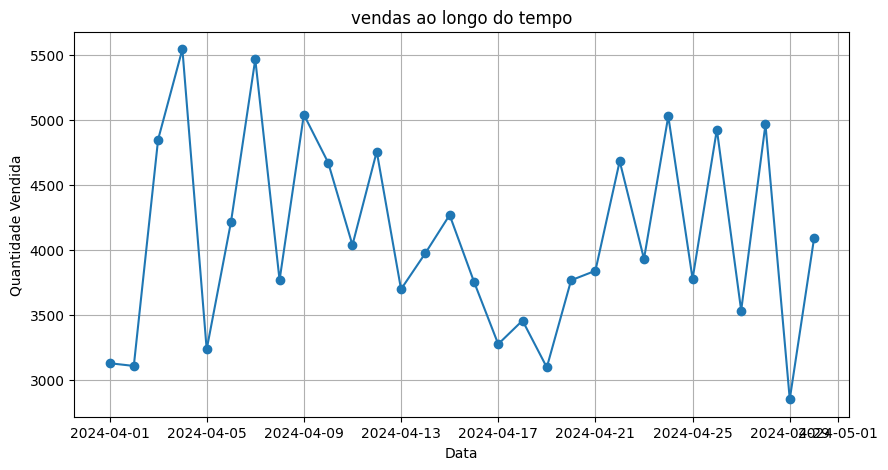


Análise de desempenho de produtos: 
nome
Produto 1       8312
Produto 100     5688
Produto 102     7857
Produto 103    25870
Produto 104    19504
               ...  
Produto 94      4868
Produto 95      9325
Produto 96      8379
Produto 98     20412
Produto 99     10601
Name: valor_total, Length: 490, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#
df_warehouse = pd.read_csv('data_warehouse.csv')

#
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto: ")
print(vendas_por_produto)

#
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por categoria de produto: ")
print(vendas_por_categoria)

#
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporis: ")
print(vendas_por_data)

#
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

#
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos: ")
print(desempenho_produto)